In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [4]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.39 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                      

In [5]:
len(model.layers)

22

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [7]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.82 µs


In [8]:
df = pd.read_csv('/content/drive/MyDrive/DATASET/Pixel_File_Grape.csv')

In [9]:
df = df.drop(columns = 'Unnamed: 0')

In [10]:

df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,148,156,169,130,138,151,128,136,150,122,...,185,188,193,185,188,192,191,194,198,0
1,142,139,154,164,161,176,167,165,177,162,...,214,210,215,202,198,203,199,195,200,0
2,174,170,176,181,177,183,174,170,176,168,...,121,120,140,97,95,115,98,96,116,0
3,152,147,149,156,151,153,152,147,149,149,...,103,103,117,109,108,124,100,98,115,3
4,132,136,147,149,153,164,149,153,164,134,...,188,191,196,187,190,194,188,191,195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9032,181,178,180,184,181,184,188,185,187,193,...,125,125,137,120,120,132,110,110,122,0
9033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9034,113,109,114,119,115,120,128,123,125,116,...,172,168,173,181,177,182,179,175,180,1
9035,177,177,180,179,179,183,165,164,168,177,...,106,104,116,120,120,131,101,101,114,0


In [11]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

9037


In [12]:
print(y)
print(x)

0       0
1       0
2       0
3       3
4       0
       ..
9032    0
9033    2
9034    1
9035    0
9036    2
Name: label, Length: 9037, dtype: int64
        0    1    2    3    4    5    6    7    8    9  ...  2342  2343  2344  \
0     148  156  169  130  138  151  128  136  150  122  ...   185   185   188   
1     142  139  154  164  161  176  167  165  177  162  ...   217   214   210   
2     174  170  176  181  177  183  174  170  176  168  ...   121   121   120   
3     152  147  149  156  151  153  152  147  149  149  ...   116   103   103   
4     132  136  147  149  153  164  149  153  164  134  ...   190   188   191   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9032  181  178  180  184  181  184  188  185  187  193  ...   121   125   125   
9033    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
9034  113  109  114  119  115  120  128  123  125  116  ...   176   172   168   
9035  177  177  180  179  179  183  165 

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [14]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [17]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 10,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/10
85/86 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.9108

86/86 [==============================] - 14s 161ms/step - loss: 0.3817 - accuracy: 0.9108 - val_loss: 0.3949 - val_accuracy: 0.8779
Epoch 2/10
85/86 [============================>.] - ETA: 0s - loss: 0.3933 - accuracy: 0.8998

86/86 [==============================] - 8s 95ms/step - loss: 0.3954 - accuracy: 0.8992 - val_loss: 0.3907 - val_accuracy: 0.8762
Epoch 3/10
85/86 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.9090

86/86 [==============================] - 10s 115ms/step - loss: 0.3663 - accuracy: 0.9086 - val_loss: 0.3873 - val_accuracy: 0.8779
Epoch 4/10
85/86 [============================>.] - ETA: 0s - loss: 0.3596 - accuracy: 0.9158

86/86 [==============================] - 9s 105ms/step - loss: 0.3601 - accuracy: 0.9156 - val_loss: 0.3795 - val_accuracy: 0.8779
Epoch 5/10
85/86 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.9153

86/86 [==============================] - 9s 106ms/step - loss: 0.3543 - accuracy: 0.9150 - val_loss: 0.3751 - val_accuracy: 0.8795
Epoch 6/10
85/86 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.9153

86/86 [==============================] - 10s 117ms/step - loss: 0.3543 - accuracy: 0.9150 - val_loss: 0.3752 - val_accuracy: 0.8861
Epoch 7/10
85/86 [============================>.] - ETA: 0s - loss: 0.3381 - accuracy: 0.9180

86/86 [==============================] - 8s 95ms/step - loss: 0.3386 - accuracy: 0.9178 - val_loss: 0.3697 - val_accuracy: 0.8927
Epoch 8/10
85/86 [============================>.] - ETA: 0s - loss: 0.3347 - accuracy: 0.9184

86/86 [==============================] - 10s 115ms/step - loss: 0.3347 - accuracy: 0.9181 - val_loss: 0.3652 - val_accuracy: 0.8927
Epoch 9/10
85/86 [============================>.] - ETA: 0s - loss: 0.3234 - accuracy: 0.9246

86/86 [==============================] - 10s 116ms/step - loss: 0.3234 - accuracy: 0.9246 - val_loss: 0.3631 - val_accuracy: 0.8911
Epoch 10/10
85/86 [============================>.] - ETA: 0s - loss: 0.3280 - accuracy: 0.9195

86/86 [==============================] - 8s 95ms/step - loss: 0.3278 - accuracy: 0.9194 - val_loss: 0.3597 - val_accuracy: 0.8911
Duration: 0:01:36.736417


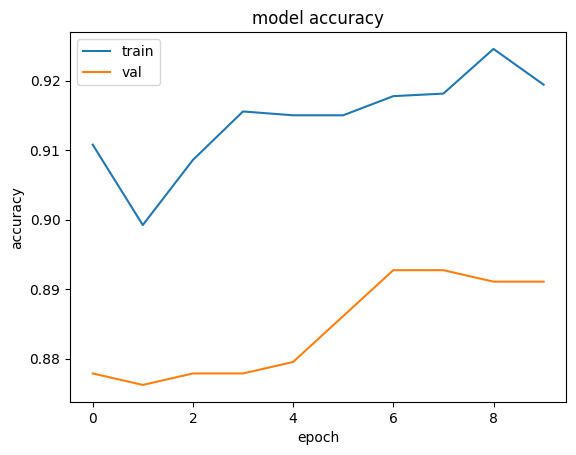

val 0.8927392959594727
min val 0.8762376308441162
acc 0.924559473991394
mean val 0.8843234300613403


In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [19]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

187/187 [==============================] - 2s 13ms/step


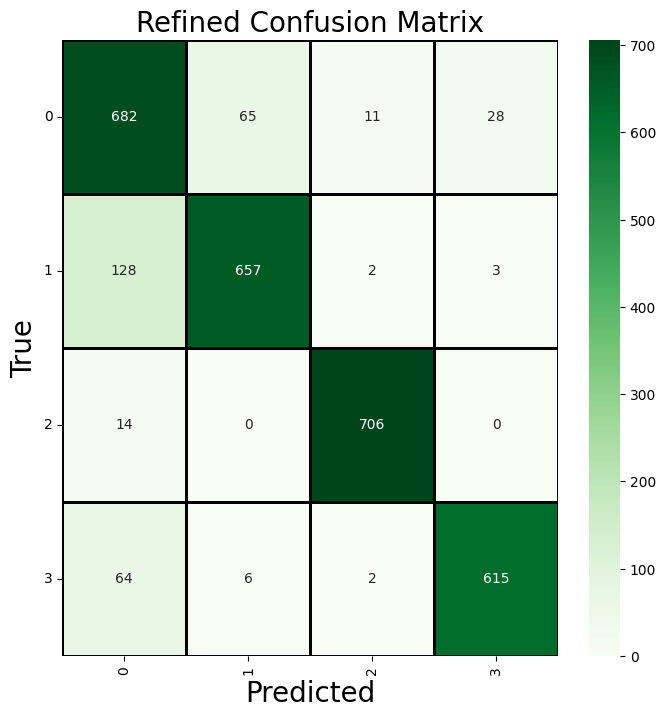

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
cmap_unblended = sns.blend_palette(["#ffffff","#f2dc4b","#f2c641","#e0c304","#fa860a"], as_cmap=True)

ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1,2,3])
cm = ConfusionM
targetnames = [0,1,2,3]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= 'Greens', linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

(2983,)
ROC AUC score: 0.9286015041975395


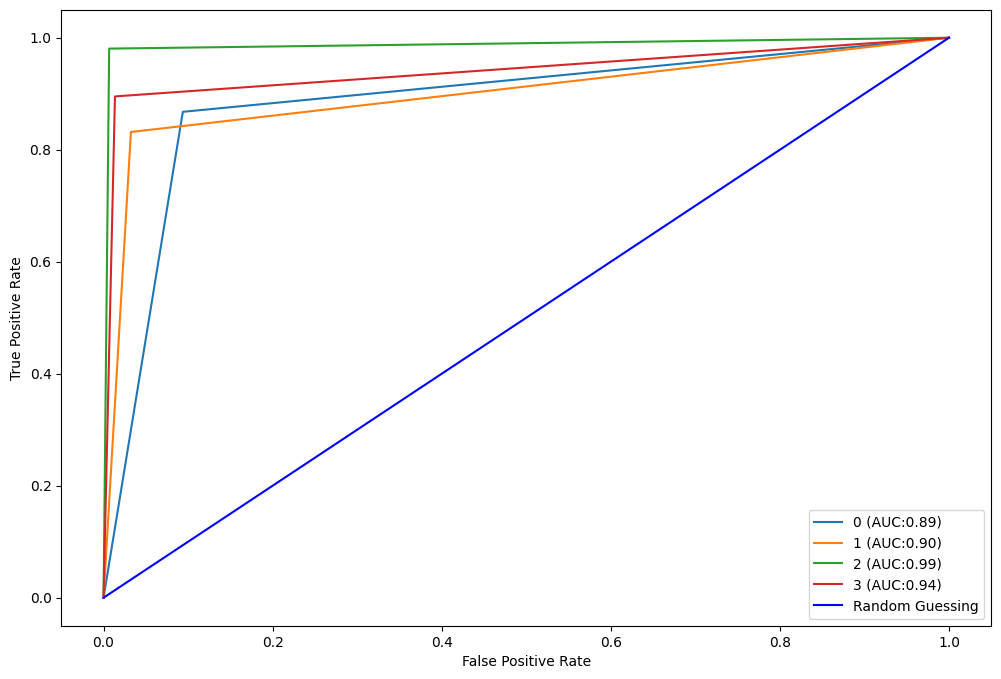

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= [0,1,2,3]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


In [24]:
from sklearn.metrics import classification_report
targetnames = [0,1,2,3]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2, 3], target_names=tar)

In [25]:
print(class_report)

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       786
           1       0.90      0.83      0.87       790
           2       0.98      0.98      0.98       720
           3       0.95      0.90      0.92       687

    accuracy                           0.89      2983
   macro avg       0.90      0.89      0.90      2983
weighted avg       0.90      0.89      0.89      2983



In [26]:
model.save_weights('/content/drive/MyDrive/MODELS/Grape/cnn_model_weights.h5')

In [27]:
model.save('/content/drive/MyDrive/MODELS/Grape/cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
